# Visualizing ,EDA and Analyzing stocks with Fun :)
Basics for handling and analyzing stock market data

### 1. Import Multiple Stock Data.
___

<img src="https://www.modernanalyst.com/Portals/0/Public%20Uploads/Fin398-Review-Business-Analysis-Function.jpg" />

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
import warnings
warnings.filterwarnings("ignore")

import glob
filelist = glob.glob("*.csv")

# Load data

santander = pd.read_csv('santander.csv', sep=',', index_col=0, parse_dates=True)
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

santander = santander[cols].copy()
santander = santander[santander.index>='2015-01-01']

df_stocks = pd.DataFrame()

for i in filelist:
    tmp = pd.read_csv(i)
    tmp['symbol'] = i.split('/')[-1].split('.')[0]
    df_stocks = df_stocks.append(tmp)

cols = ['Date', 'Close', 'Volume', 'symbol']
df_stocks = df_stocks[cols].copy()
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])


# create new dataframe with just closing price for each stock
df = df_stocks.pivot(index='Date', columns='symbol', values='Close')

# subset data since 2015
df = df[df.index>='2015-01-01']
df.tail()

symbol,abengoa,acciona,acerinox,acs,atresmedia,banco-sabadell,bankinter,bbva,bme,caixabank,...,indra,mapfre,mediaset,naturgy-energy,red-elctrica,repsol,sacyr,santander,siemens-gamesa,telefnica
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-03,0.0204,97.90,8.17,36.77,4.204,0.993,6.378,4.862,22.60,2.71,...,9.300,2.608,6.286,25.74,19.135,14.485,2.014,3.940,14.235,7.195
2019-06-04,0.0207,98.85,8.40,37.25,4.322,1.012,6.474,5.010,22.42,2.81,...,9.360,2.657,6.368,25.58,18.805,14.630,2.118,4.042,14.305,7.317
2019-06-05,0.0213,100.60,8.25,37.40,4.352,0.996,6.500,4.980,22.46,2.71,...,9.510,2.637,6.394,25.75,19.185,14.535,2.184,4.011,14.280,7.394
2019-06-06,0.0221,102.00,8.30,37.19,4.340,0.947,6.320,4.944,22.78,2.66,...,9.490,2.632,6.360,25.93,19.440,14.590,2.118,3.970,14.300,7.398
2019-06-07,0.0236,102.10,8.30,37.30,4.394,0.940,6.354,4.923,22.44,2.62,...,9.735,2.666,6.912,25.90,19.670,14.660,2.170,3.965,14.435,7.470


### 2. Visualizing Stock Data

#### Plot the Daily Closing Price and Volume of a Stock

<img src="https://modernanalyst.com/Portals/0/Public%20Uploads/Fin370-What-is-Data-Analysis-Telling-Us.jpg" />

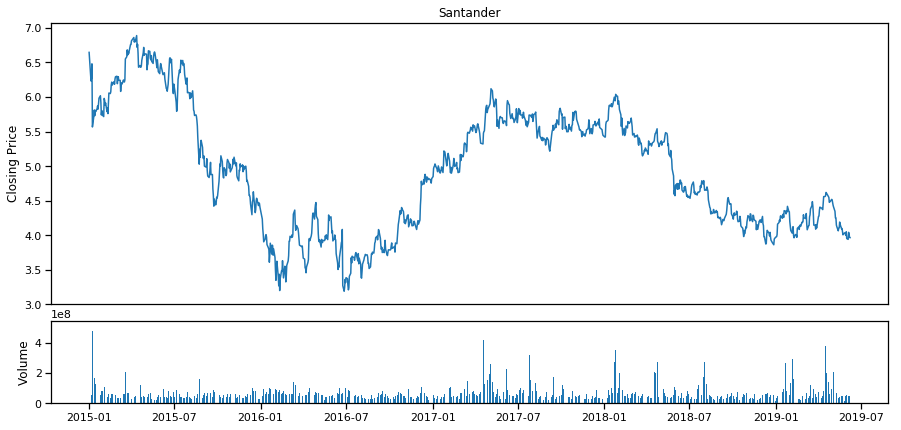

In [2]:
plt.figure(figsize=(15,7))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(santander.index, santander['Close']) 
bottom.bar(santander.index, santander['Volume']) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('Santander')
top.set_ylabel('Closing Price')
bottom.set_ylabel('Volume');

#### Plot a Histogram of the Daily Closing Price

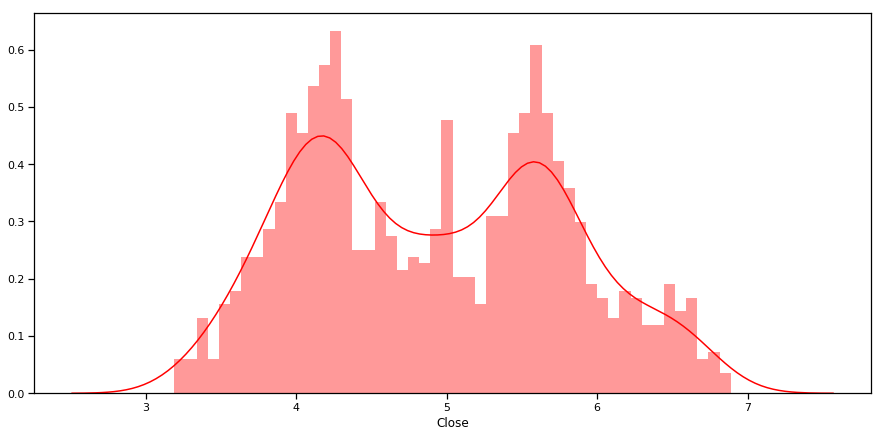

In [3]:
plt.figure(figsize=(15,7))
sns.distplot(santander['Close'].dropna(), bins=50, color='red');

#### Chart Simple Moving Average

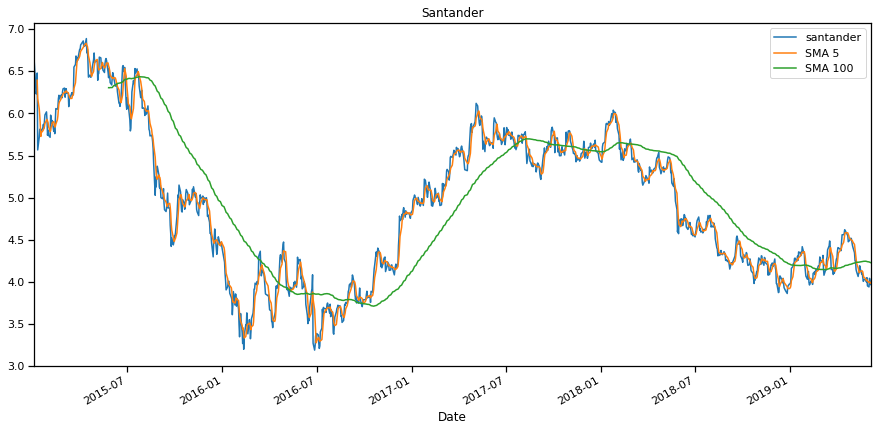

In [4]:
# simple moving averages
sma5 = santander['Close'].rolling(5).mean() #5 days
sma100 = santander['Close'].rolling(100).mean() #100 days
 
santander_sma = pd.DataFrame({'santander': santander['Close'], 'SMA 5': sma5, 'SMA 100': sma100})
santander_sma.plot(figsize=(15, 7), legend=True, title='Santander');

#### Plot  Daily Closing Price of multiple stocks

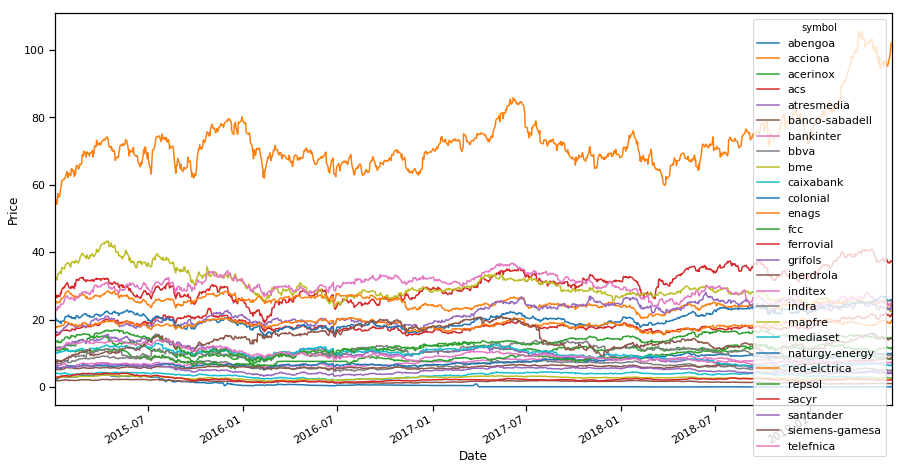

In [5]:
df.plot(figsize=(15,8))
plt.ylabel('Price');

As each stock has different prices, it is difficult to compare between them to visualise any relationships. Some transformation can help to normalise this issue.

#### Normalizing multiple stocks
Dividing all the closing price to the first closing price in the period.

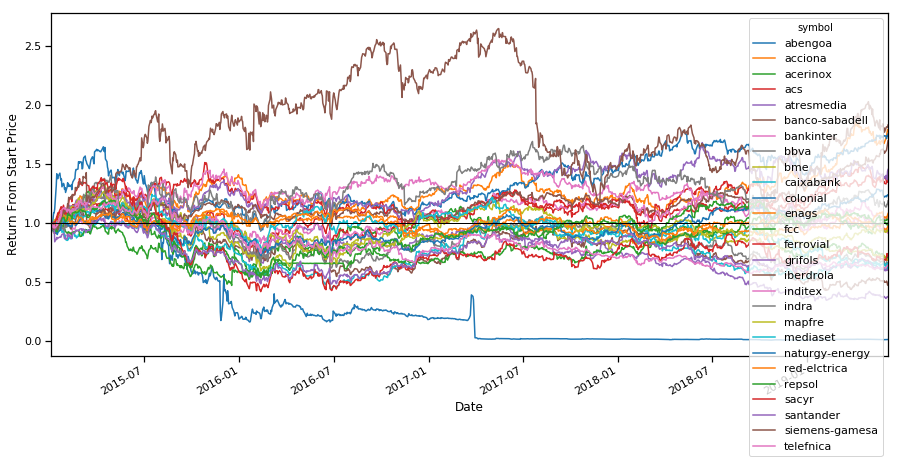

In [6]:
returnfstart = df.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(15,7)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price');

Another way is the plot the daily percentage change of stock price.

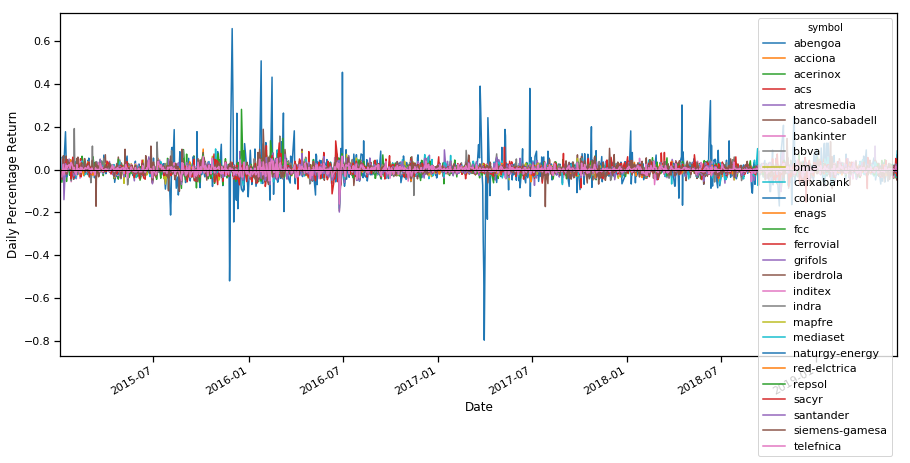

In [7]:
df.pct_change().plot(figsize=(15,7))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Daily Percentage Return');

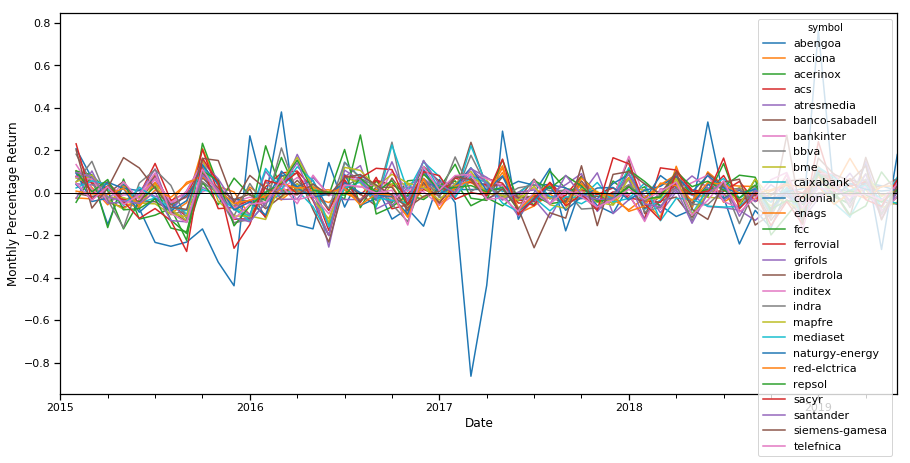

In [8]:
# Resample df to business months, take last observation as value 
monthly = df.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change().plot(figsize=(15,7))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Monthly Percentage Return');

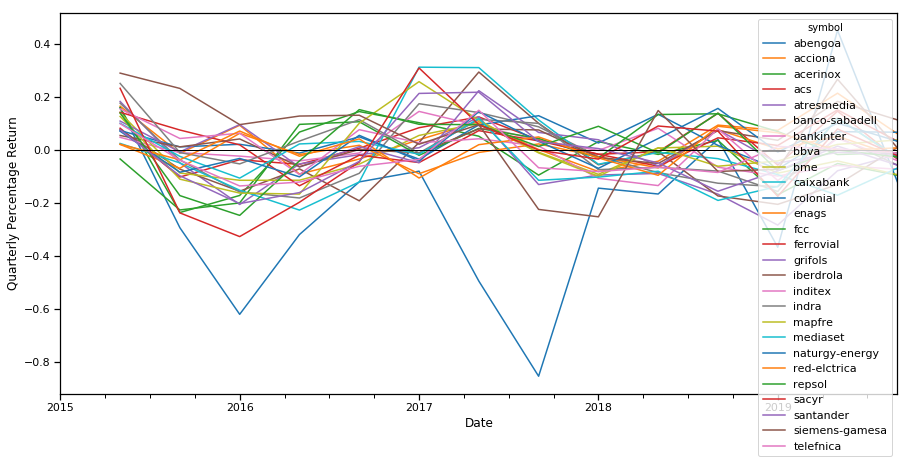

In [9]:
# Resample df to quarters, take the mean as value per quarter
quarter = df.resample('4M').mean()

# Calculate the quarterly percentage change
quarter.pct_change().plot(figsize=(15,7))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Quarterly Percentage Return');

Because of stocks overlapping each other, it is a little hard to make any comparisons here. It is better to have some hard numbers so lets do some correlation plots.

#### Correlation Plots

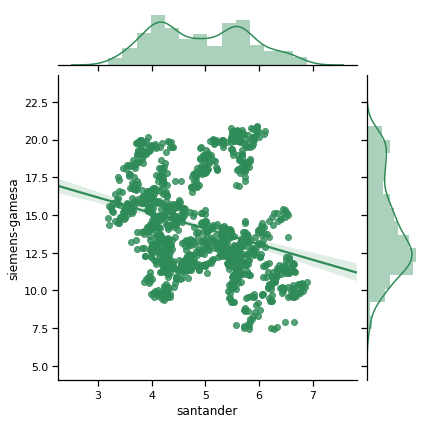

In [10]:
sns.jointplot('santander', 'siemens-gamesa', df, kind='reg', color='seagreen');

Just looking at the chart, you can see that the relationship is somewhat linear. Strongly correlated stocks can be used in pair trading

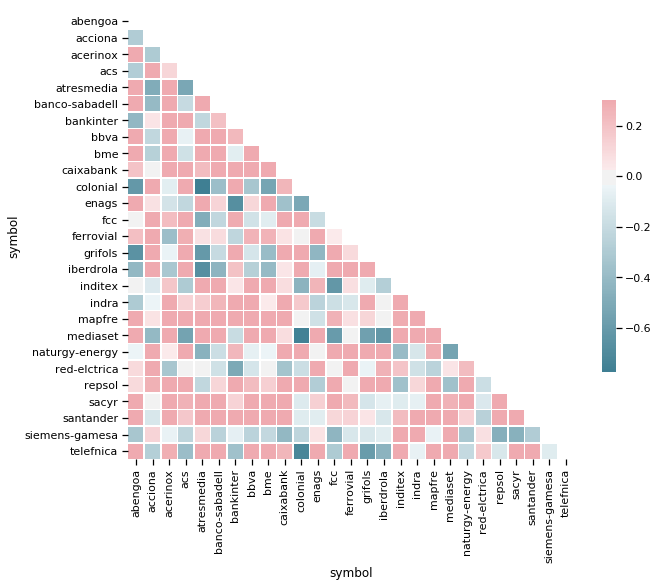

In [11]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});


PairGrid can be used for paired comparisons with flexibility on the type of charts being plotted. For this case, a scatterplots, kde plots and histograms are plotted.

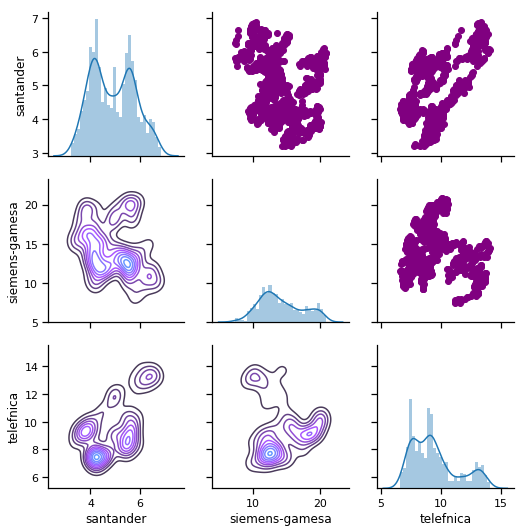

In [12]:
fig = sns.PairGrid(df[['santander', 'siemens-gamesa', 'telefnica']].dropna())
# define top, bottom and diagonal plots
fig.map_upper(plt.scatter, color='purple')
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(sns.distplot, bins=30);

Distribution of daily percentage change

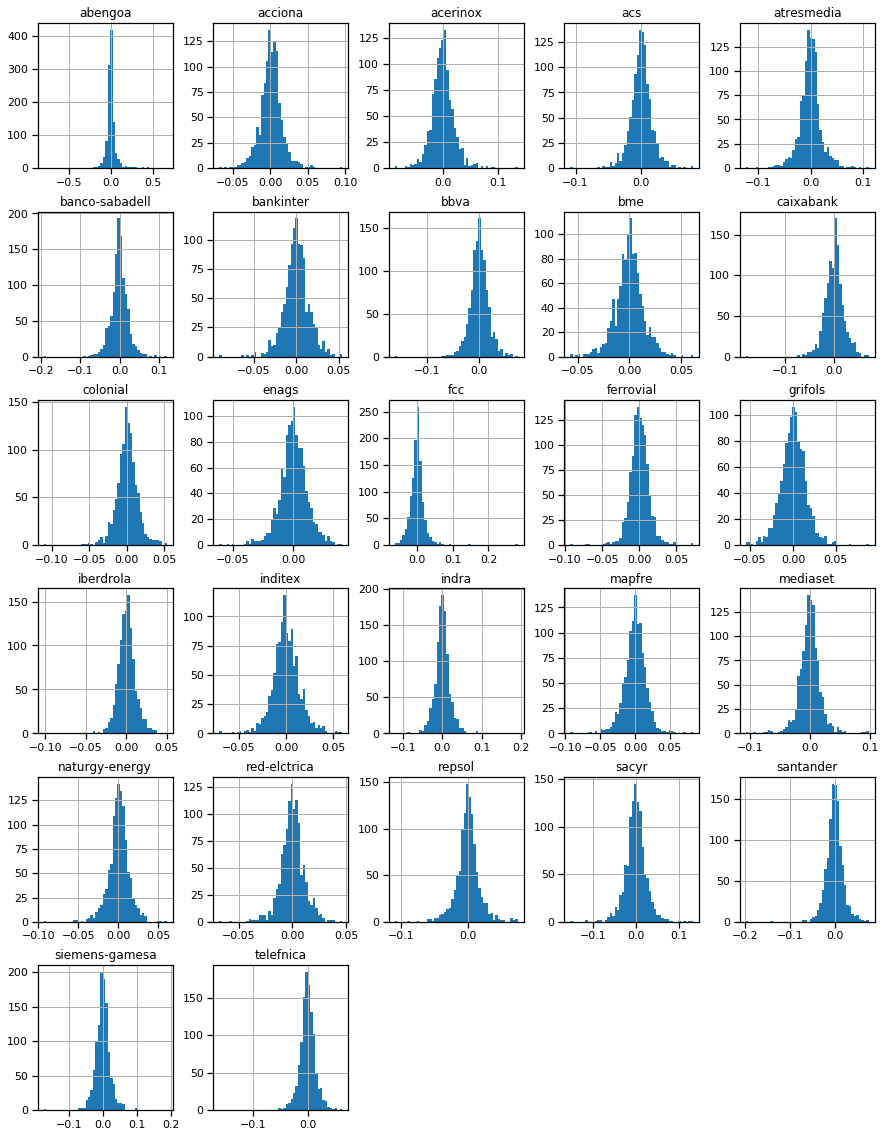

symbol,abengoa,acciona,acerinox,acs,atresmedia,banco-sabadell,bankinter,bbva,bme,caixabank,...,indra,mapfre,mediaset,naturgy-energy,red-elctrica,repsol,sacyr,santander,siemens-gamesa,telefnica
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,...,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,-0.001022,0.000622,-0.000113,0.000394,-0.000655,-0.000428,0.000031,-0.000209,-0.000243,-0.000240,...,0.000366,0.000068,-0.000209,0.000270,0.000129,0.000182,0.000037,-0.000263,0.000830,-0.000277
std,0.072520,0.014678,0.020082,0.016186,0.020693,0.021853,0.014578,0.017944,0.013753,0.019768,...,0.020971,0.015759,0.017883,0.012912,0.011157,0.017659,0.024932,0.019485,0.024396,0.015164
min,-0.797794,-0.068326,-0.085816,-0.107901,-0.123301,-0.192924,-0.090853,-0.161636,-0.057160,-0.181034,...,-0.120930,-0.093034,-0.107083,-0.093175,-0.067868,-0.109355,-0.152422,-0.198825,-0.173269,-0.161146
25%,-0.025006,-0.006995,-0.011543,-0.008318,-0.010984,-0.011170,-0.008082,-0.009723,-0.007623,-0.011564,...,-0.010070,-0.008334,-0.009269,-0.006232,-0.005871,-0.007976,-0.012837,-0.010538,-0.010903,-0.007998
50%,-0.003416,0.000781,0.000000,0.000634,-0.000793,-0.000226,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000394,0.000000,0.000516,0.000000,0.000306,0.000000,0.000219,0.000437,-0.000400
75%,0.015277,0.008591,0.009928,0.008900,0.009485,0.010994,0.008177,0.009566,0.007404,0.010536,...,0.009697,0.009276,0.008970,0.007461,0.005937,0.008424,0.012681,0.009731,0.011326,0.007613
max,0.659091,0.095698,0.134487,0.079730,0.109948,0.119861,0.053934,0.073150,0.061479,0.069930,...,0.191542,0.083642,0.097891,0.060127,0.046207,0.074941,0.133698,0.075679,0.188246,0.062712


In [13]:
daily_pct_c = df/ df.shift(1) -1
daily_pct_c.hist(bins=50, figsize=(15,20))
plt.show()

display(daily_pct_c.describe())

Cumulative daily returns

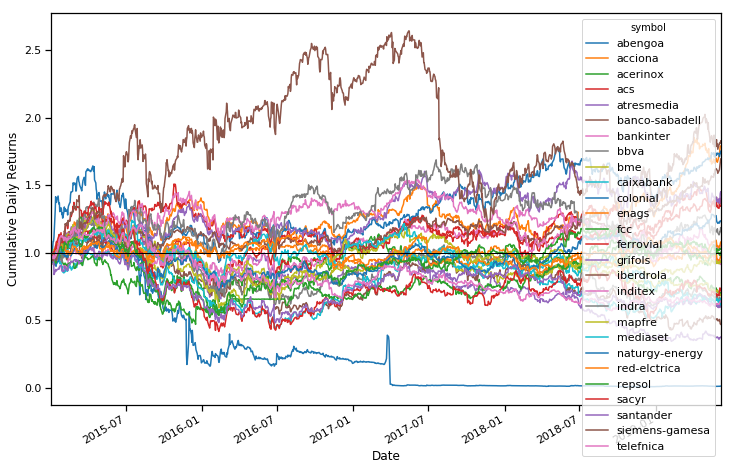

In [14]:
cum_daily_return = (1 + daily_pct_c).cumprod()

cum_daily_return.plot(figsize=(12,8))
plt.ylabel('Cumulative Daily Returns');
plt.axhline(1, color='black', lw=1)
plt.show()

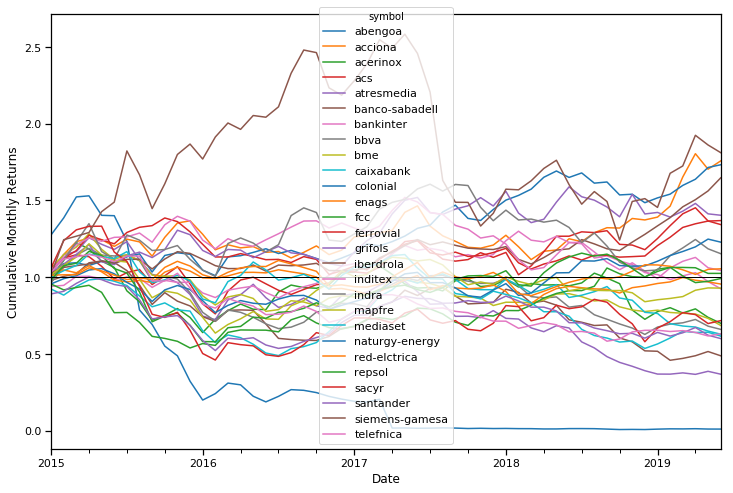

In [15]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

cum_monthly_return.plot(figsize=(12,8))
plt.ylabel('Cumulative Monthly Returns');
plt.axhline(1, color='black', lw=1)
plt.show()

Volatility Calculation

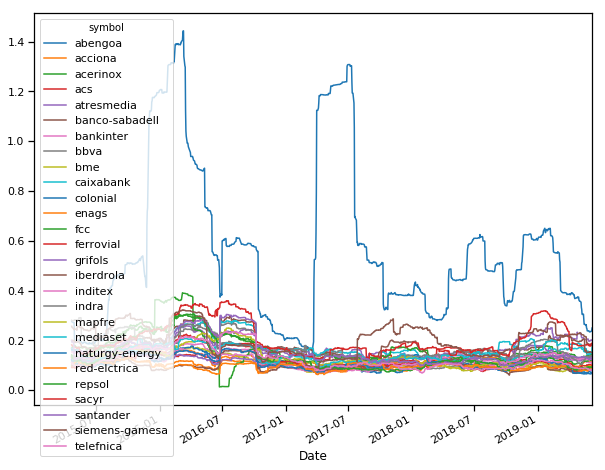

In [16]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_c.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

### Building a trading strategy

> ITS A BASICS (OPTIONAL)

<img src="https://i.pinimg.com/originals/8d/b1/0d/8db10de30b4d865a3ed35324c57ceb3b.png" />

In [17]:
santander.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,6.696,6.725,6.559,6.645,42200000
2015-01-05,6.600,6.687,6.327,6.341,58030000
2015-01-06,6.370,6.400,6.228,6.231,47480000
2015-01-07,6.285,6.404,6.208,6.270,51880000
2015-01-08,6.407,6.500,6.349,6.479,22910000


In [18]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=santander.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = santander['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = santander['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

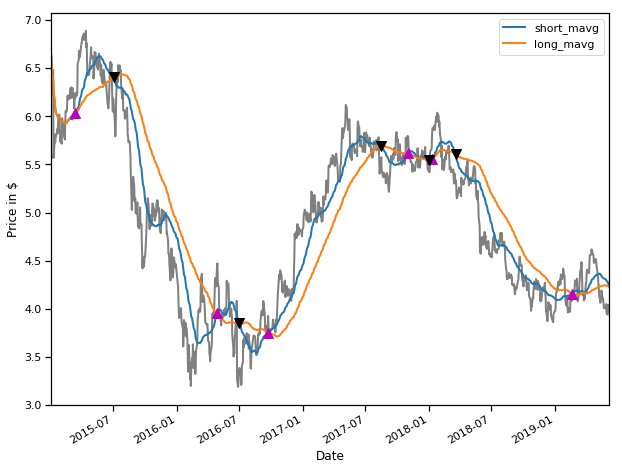

In [19]:
# Initialize the plot figure
fig = plt.figure(figsize=(10, 8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
santander['Close'].plot(ax=ax1, color='grey', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

### Backtesting a strategy

<img src="https://d1yhils6iwh5l5.cloudfront.net/charts/resized/57084/large/zaz9.jpg" />

In [20]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['santander'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(santander['Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(santander['Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(santander['Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()


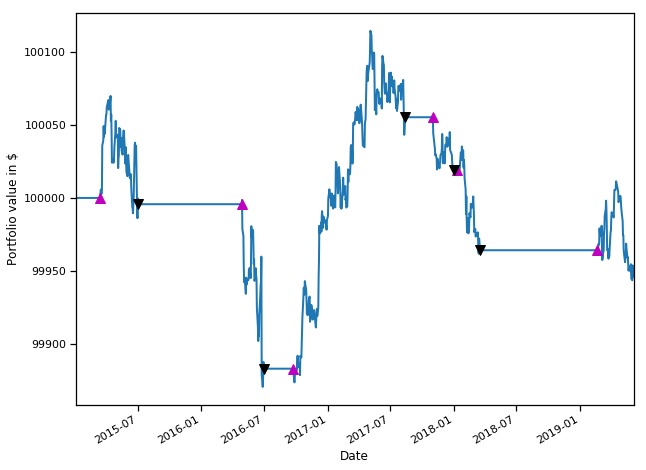

In [21]:
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

### Evaluating Moving Average Crossover Strategy
#### Sharpe Ratio

In [22]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(np.round(sharpe_ratio,2))

-0.13


#### Maximum Drawdown

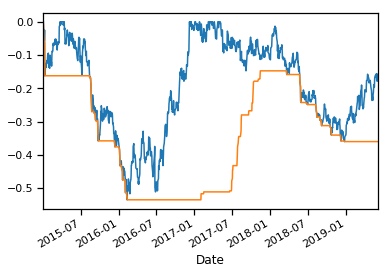

In [23]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = santander['Close'].rolling(window, min_periods=1).max()
daily_drawdown = santander['Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

#### Compound Annual Growth Rate (CAGR)

In [24]:
# Get the number of days in `aapl`
days = (santander.index[-1] - santander.index[0]).days

# Calculate the CAGR 
cagr = ((((santander['Close'][-1]) / santander['Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(np.round(cagr,3))

-0.101


### Forecast stock price

In [25]:
# Drop the columns
ph_df = santander.drop(['Open', 'High', 'Low','Volume'], axis=1)
ph_df.reset_index(inplace=True)
ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
ph_df['ds'] = pd.to_datetime(ph_df['ds'])
ph_df.head()

,ds,y
0,2015-01-02,6.645
1,2015-01-05,6.341
2,2015-01-06,6.231
3,2015-01-07,6.270
4,2015-01-08,6.479


In [ ]:
!pip install fbprophet

In [26]:
from fbprophet import Prophet
m = Prophet()
m.fit(ph_df)

# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1493,2020-06-02,3.012086,1.510372,4.707381
1494,2020-06-03,3.007872,1.438204,4.672680
1495,2020-06-04,3.005160,1.497296,4.745995
1496,2020-06-05,2.987612,1.458498,4.779820
1497,2020-06-06,3.347601,1.778633,5.019946


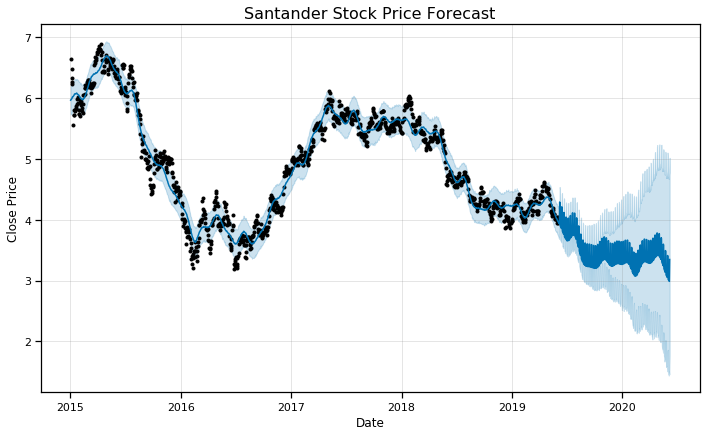

In [27]:
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Santander Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)
plt.show()

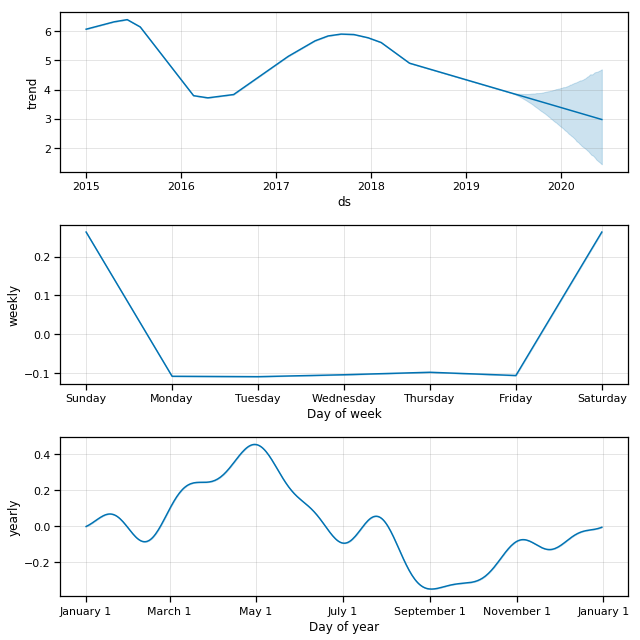

In [28]:
fig2 = m.plot_components(forecast)
plt.show()

### Monthly Predictions

<img src="http://editorialcartoonists.com/cartoons/Rose,J/2019/Rose,J20190103_low.jpg" />

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


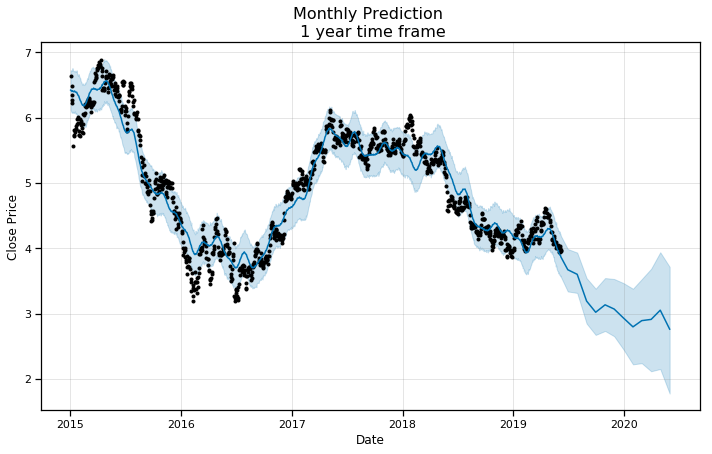

In [29]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)

plt.show()

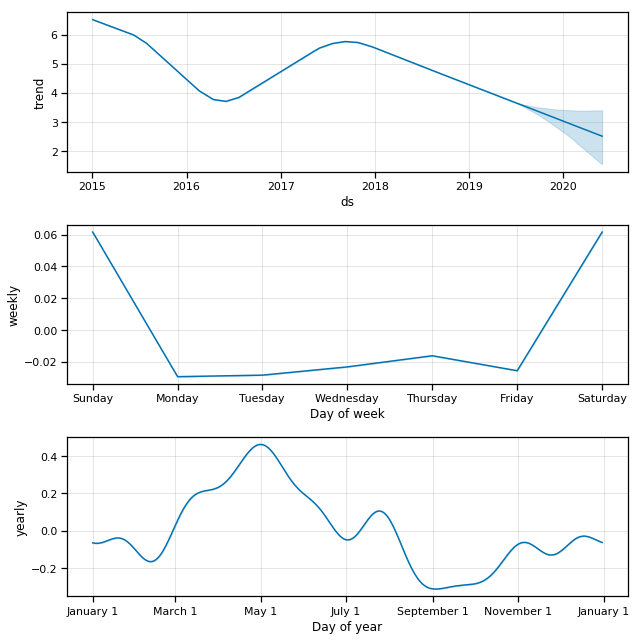

In [30]:
fig = m.plot_components(fcst)
plt.show()

# OHLC -> (OPEN-HIGH-LOW-CLOSE) 
____

<img src="https://static.seekingalpha.com/uploads/2017/3/30/18346232-14908974725810428_origin.png" />

In [31]:
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [32]:
trace = go.Ohlc(x=santander.index,
                open=santander['Open'],
                high=santander['High'],
                low=santander['Low'],
                close=santander['Close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Santander Historical Price',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price'},
    'shapes': [{
        'x0': '2018-12-31', 'x1': '2018-12-31',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2019-01-01', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': '2019 <br> starts'
    }]
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')


### Moving Averages

In [33]:
# Moving Averages (10, 50 and 200)
santander['10_d_avg'] = santander.Close.rolling(window=10).mean()
santander['50_d_avg'] = santander.Close.rolling(window=50).mean()
santander['200_d_avg'] = santander.Close.rolling(window=200).mean()
close_p = santander['Close'].values.tolist()


# Variables to insert into plotly
ten_d = santander['10_d_avg'].values.tolist()
fifty_d = santander['50_d_avg'].values.tolist()
twoh_d = santander['200_d_avg'].values.tolist()
date = santander.index.values.tolist()

# Set date as index
#amzn_df = amzn_df.set_index('date')

In [34]:
fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True)

colors = ['#ff4500', '#92a1cf', '#6E6E6E']
avgs = ['10_d_avg', '50_d_avg', '200_d_avg']
# for i,c in zip(range(n),color):
#    ax1.plot(x, y,c=c)

for col, c in zip(avgs, colors):
    fig.append_trace({'x': santander.index, 'y': santander[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)
for col in ['Close']:
    fig.append_trace({'x': santander.index, 'y': santander[col], 'type': 'scatter', 'name': 'Closing Price', 'line':{'color': '#01DF3A'}}, 2, 1)
    
fig['layout'].update(height=800,title='Relationship between MAs <br> and Closing Price',
                    paper_bgcolor='#F2DFCE', plot_bgcolor='#F2DFCE')
    
iplot(fig, filename='pandas/mixed-type subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]



In [35]:
# Take off the date index
santander = santander.reset_index()

# Plotly
trace0 = go.Scatter(
    x = santander['Date'],
    y = ten_d,
    name = '10-day MA',
    line = dict(
        color = ('#ff6347'),
        width = 4)
)
trace1 = go.Scatter(
    x = santander['Date'],
    y = fifty_d,
    name = '50-day MA',
    line = dict(
        color = ('#92a1cf'),
        width = 4,
    dash="dot")
)
trace2 = go.Scatter(
    x = santander['Date'],
    y = twoh_d,
    name = '200-day MA',
    line = dict(
        color = ('#2EF688'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)

data = [trace0, trace1, trace2]


# Edit the layout
layout = dict(title = 'Moving Averages for Santander',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'),
#               annotations=[
#         dict(
#             x='2016-01-13',
#             y=657,
#             xref='x',
#             yref='y',
#             text='<i> First major decline <br> after 10-d crosses <br> 50-d moving average </i>',
#             showarrow=True,
#             arrowhead=5,
#             ax=5,
#             ay=-50
#         ), dict(
#         x = "2016-02-24",
#         y = 535,
#         text = "<i>Upward trend after <br> 10-day crosses <br>200-day moving average </i>",
#         textangle = 0,
#         ax = 50,
#         ay = 50,
#         font = dict(
#           color = "black",
#           size = 12
#         )
#         )],
              paper_bgcolor='#FFF9F5',
              plot_bgcolor='#FFF9F5'
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')

<img src="https://cdn.japantimes.2xx.jp/wp-content/uploads/2015/09/ca20150906eda-870x494.jpg" />

# HAPPY LEARNING 

<img src="http://chittagongit.com/download/134635" />